In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

In [38]:
from datasets import *
from preprocess import *
from functions import *
import pywt

In [4]:
X = sinusoid_dataset(100, 10)

In [5]:
X.shape

(90, 10)

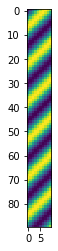

In [6]:
plt.imshow(X)

In [7]:
dataset = TimeSeriesDataset(X, lambda x: coefs_wavelet(x, pywt.Wavelet('haar')), normalize=True)

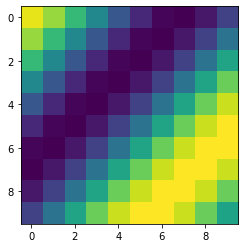

In [8]:
X, C = dataset[0]
plt.imshow(inverse_wavelet(C[0], pywt.Wavelet('haar')))

In [18]:
C[0]

tensor([[ 0.6729, -0.0701, -0.7699, -0.9936, -0.6031,  0.1516,  0.2044,  0.1308,
         -0.0236, -0.1634],
        [-0.0701, -0.7699, -0.9936, -0.6031,  0.1603,  0.2044,  0.1308, -0.0236,
         -0.1634, -0.2022],
        [-0.7699, -0.9936, -0.6031,  0.1603,  0.8246,  0.1308, -0.0236, -0.1634,
         -0.2022, -0.1160],
        [-0.9936, -0.6031,  0.1603,  0.8246,  0.9791, -0.0236, -0.1634, -0.2022,
         -0.1160,  0.0420],
        [-0.6031,  0.1603,  0.8246,  0.9791,  0.5283, -0.1634, -0.2022, -0.1160,
          0.0420,  0.1740],
        [ 0.1516,  0.2044,  0.1308, -0.0236, -0.1634, -0.0282,  0.0029,  0.0323,
          0.0417,  0.0253],
        [ 0.2044,  0.1308, -0.0236, -0.1634, -0.2022,  0.0029,  0.0323,  0.0417,
          0.0253, -0.0067],
        [ 0.1308, -0.0236, -0.1634, -0.2022, -0.1160,  0.0323,  0.0417,  0.0253,
         -0.0067, -0.0346],
        [-0.0236, -0.1634, -0.2022, -0.1160,  0.0420,  0.0417,  0.0253, -0.0067,
         -0.0346, -0.0411],
        [-0.1634, -

In [22]:
C[0][:,0]

[autoreload of functions failed: Traceback (most recent call last):
  File "/home/anand/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/anand/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/home/anand/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/anand/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/anand/dev/koopman-funct

tensor([ 0.6729, -0.0701, -0.7699, -0.9936, -0.6031,  0.1516,  0.2044,  0.1308,
        -0.0236, -0.1634], dtype=torch.float64)

In [23]:
C[0].t()[0,:]

tensor([ 0.6729, -0.0701, -0.7699, -0.9936, -0.6031,  0.1516,  0.2044,  0.1308,
        -0.0236, -0.1634], dtype=torch.float64)

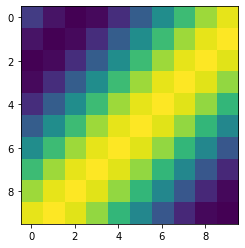

In [153]:
plt.imshow(X[0])

In [65]:
import torch

In [68]:
x_shape = dataset.input_shape
gaussian_kernel = RFFKernel(x_shape[1], D=5, metric='rbf')
laplace_kernel = RFFKernel(x_shape[1], D=5, metric='laplace')

In [71]:
gaussian_kernel(dataset[0][0][0][1])

tensor([[-0.5664,  0.4560,  0.3945,  0.4685, -0.5315]], dtype=torch.float64)

In [70]:
gaussian_kernel(dataset[0][0][0])

tensor([[-0.6323,  0.4793,  0.5401,  0.6206, -0.0916],
        [-0.5667,  0.4561,  0.3946,  0.4678, -0.5319],
        [-0.6011,  0.4851,  0.2857, -0.5295,  0.2463],
        [-0.5864,  0.5502,  0.2699,  0.1713,  0.5238],
        [-0.0268,  0.6125,  0.3546,  0.1471,  0.3756],
        [ 0.6187,  0.6316,  0.4980, -0.5177, -0.3390],
        [ 0.2119,  0.5944,  0.6134,  0.4769, -0.4107],
        [-0.4947,  0.5261,  0.6183,  0.6199,  0.6319],
        [-0.6234,  0.4698,  0.5089,  0.6308, -0.3728],
        [-0.5613,  0.4582,  0.3642,  0.2989, -0.3690]], dtype=torch.float64)

In [61]:
dataset[0][0][0][0].shape

torch.Size([10])